<a href="https://colab.research.google.com/github/MartaElvira/custom-scripts/blob/master/Trabajo_Marta_Ernesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='blue'>
    
# Trabajo de Aprendizaje automatico II
    
### Marta Elvira Rey y Ernesto Pérez Sancho

</font>

In [ ]:
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

La base de datos que vamos a utilizar la hemos obtenido de Kaggle (https://www.kaggle.com/insiyeah/musicfeatures?select=data.csv). Esta dataset consta de 1000 pistas de audio de 30 segundos de duración y contiene 10 géneros diferentes (blues, clásica, country, disco, hiphop, jazz, metal, pop, reggae y rock), cada uno representado por 100 pistas, es decir, está perfectamente balanceado. 

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.3594,50,0.3803,0.2483,2116.9430,1956.6111,4196.1080,0.1273,-26.9298,...,14.3366,-13.8218,7.5628,-6.1814,0.3302,-6.8296,0.9659,-7.5708,2.9190,blues
1,blues.00022.au,95.7031,44,0.3065,0.1135,1156.0705,1497.6682,2170.0535,0.0586,-233.8608,...,-2.2506,3.9592,5.3226,0.8120,-1.1072,-4.5566,-2.4365,3.3169,-0.6085,blues
2,blues.00031.au,151.9991,75,0.2535,0.1516,1331.0740,1973.6434,2900.1741,0.0430,-221.8025,...,-13.0377,-12.6522,-1.8219,-7.2601,-6.6603,-14.6827,-11.7193,-11.0252,-13.3873,blues
3,blues.00012.au,184.5703,91,0.2693,0.1191,1361.0455,1567.8046,2739.6251,0.0691,-207.2081,...,-0.6132,0.3849,2.6051,-5.1889,-9.5275,-9.2444,-2.8483,-1.4187,-5.9326,blues
4,blues.00056.au,161.4990,74,0.3911,0.1377,1811.0761,2052.3326,3927.8096,0.0755,-145.4346,...,7.4572,-10.4704,-2.3605,-6.7836,2.6711,-4.7609,-0.9490,0.0248,-2.0053,blues


Mostramos un resumen del dataset para hacernos una idea del rango de valores en el que se encuentra cada columna.

In [ ]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,...,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,119.6017,57.1380,0.3787,0.1309,2201.8342,2242.5596,4571.7022,0.1036,-144.4792,99.5522,...,-6.0211,4.4716,-4.7972,1.7815,-3.8703,1.1480,-3.9674,0.5073,-2.3288,-1.0949
std,28.2974,14.2257,0.0817,0.0657,715.9613,526.3377,1574.7700,0.0418,100.2357,31.3319,...,6.8190,6.7173,6.1709,5.0095,4.8744,4.5791,4.5507,3.8691,3.7556,3.8376
min,54.9784,18.0000,0.1718,0.0053,569.9307,897.9943,749.0621,0.0217,-552.0641,-1.5271,...,-28.0523,-15.8052,-27.5423,-12.5988,-17.5455,-15.6936,-17.2278,-11.9757,-18.5042,-19.9352
25%,99.3840,47.0000,0.3196,0.0866,1627.7939,1907.1365,3380.9566,0.0703,-200.6951,76.8115,...,-10.9668,-0.5516,-9.3634,-1.6401,-7.1648,-1.8571,-7.1943,-2.0040,-4.6703,-3.3680
50%,117.4538,56.0000,0.3831,0.1224,2209.4688,2221.4090,4658.6718,0.0995,-120.2061,98.4526,...,-5.9202,3.8918,-4.1998,1.8794,-3.6145,1.2119,-4.0591,0.6698,-2.3913,-1.1552
75%,135.9992,65.2500,0.4360,0.1758,2691.9697,2578.4744,5534.1978,0.1320,-73.8950,119.8936,...,-1.0042,9.7061,-0.1610,5.1553,-0.3235,4.3507,-0.8430,3.1125,0.1491,1.3037
max,234.9077,117.0000,0.6636,0.3980,4434.4394,3509.5787,8676.4059,0.2748,42.0346,193.0965,...,17.4210,23.0376,13.0543,18.1617,12.3576,13.4688,11.4900,15.3793,14.6869,15.3690


Separamos la variable objetivo del resto de variables.

In [ ]:
y = df['label']
X = df.drop(['filename','label'], axis=1)

In [ ]:
X.shape

(1000, 28)

In [ ]:
np.unique(y)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

Transformamos la variable categórica *y*, que contiene los distintos tipos de música, en una variable numérica. Para ello utilizamos *LabelEncoder*.

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

Comprobamos que el conjunto está balanceado.

In [ ]:
from collections import Counter
print(Counter(y))

Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100})


Observamos que el conjunto está balanceado puesto que tenemos 100 muestras de cada clase, por tanto, de momento, no vamos a utilizar ninguna de las técnicas de balanceo de datos.

# Separación en train y test 

Probamos diferentes técnicas para separar los datos en conjunto de entrenamiento (train) y conjunto de test y vemos cúal nos da mejores resultados. Utilizaremos el 80% de los datos para el entrenamiento y el 20% restante para test. Aplicaremos el método de k-vecinos más cercanos (*KNN*), con los atributos por defecto, y evaluaremos con la métrica accuracy score. Utilizaremos siempre *random_state=1* para poder reproducir y comparar los modelos.

**NOTA:** No guardaremos un conjunto de validación, ya que cuando empezamos el trabajo en clase solo dividiamos el conjunto en train y test y ahora nos supone hacer muchos cambios.

Vamos a crear una lista en la que iremos metiendo el mejor resultado de cada método y así poder mostrarlos en una tabla final para poder decidir cuál es el mejor.

In [ ]:
result = []

**1. Validación simple (Hold out)**

Por defecto *shuffle = True*, es decir, se mezclan los datos antes de separarlos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy: ', knn.score(X_test, y_test))

Accuracy:  0.325
Wall time: 109 ms


Observamos que la accuracy obtenida es muy baja, vamos a probar a escalar los datos a ver si el resultado mejora.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
result.append(['HoldOut', score])
print('Accuracy: ', score)

Accuracy:  0.605
Wall time: 32 ms


Como vemos, la accuracy obtenida ahora es mejor que la anterior, por tanto a partir de ahora utilizaremos los datos escalados.

**2. Validación dejando uno fuera (Leave one out)**

Utilizamos *Pipeline* para ejecutar el escalado de datos y el modelo *KNN* y *Cross Validation* para calcular el accuracy.

In [ ]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = LeaveOneOut()
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append([cv.__class__.__name__, score])
print('Accuracy: ', score)

Accuracy:  0.62
Wall time: 10.8 s


**3. Validación cruzada k-iteraciones (k-fold)**

Aplicamos el método *k-fold* con el atributo *shuffle=True* ya que las instancias están ordenadas por clases. Utilizaremos *n_splits=5* para que las particiones que hacemos tengan un 80% (4/5) para el train y 20% (1/5) para el test, la cual es la división aconsejada para obtener el resultado más óptimo.


In [ ]:
%%time
from sklearn.model_selection import KFold

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append([cv.__class__.__name__, score])
print('Accuracy: ', score)

Accuracy:  0.599
Wall time: 99.9 ms


**4. Repeticiónes de k-fold (Repeated k-fold)**

Con Repeated *k-fold* vamos a repetir 5 veces el método anterior para obtener más combinaciones de train y tests diferentes.

In [ ]:
%%time
from sklearn.model_selection import RepeatedKFold

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append([cv.__class__.__name__, score])
print('Accuracy: ', score)

Accuracy:  0.6056
Wall time: 384 ms


**5. k-fold estratificado (Stratified k-fold)**

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append([cv.__class__.__name__, score])
print('Accuracy: ', score)

Accuracy:  0.591
Wall time: 113 ms


**6. Repeticiones de k-fold estratificado (Repeated stratified k-fold)**

In [ ]:
%%time
from sklearn.model_selection import RepeatedStratifiedKFold

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append([cv.__class__.__name__, score])
print('Accuracy: ', score)

Accuracy:  0.6086
Wall time: 454 ms


**7. Validador cruzado de permutación aleatoria (Shuffle Split)**

In [ ]:
%%time
from sklearn.model_selection import ShuffleSplit

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append([cv.__class__.__name__, score])
print('Accuracy: ', score)

Accuracy:  0.622
Wall time: 82 ms


Mostramos la tabla de resultados.

In [ ]:
tabla = pd.DataFrame(result, columns = ['Método','Accuracy'])
tabla.style.applymap(lambda x: "background-color:" 'salmon', subset = tabla['Accuracy'].idxmax())

,Método,Accuracy
0,HoldOut,0.6050
1,LeaveOneOut,0.6200
2,KFold,0.5990
3,RepeatedKFold,0.6056
4,StratifiedKFold,0.5910
5,RepeatedStratifiedKFold,0.6086
6,ShuffleSplit,0.6220


Vemos que la mayor accuracy la obtenemos con el método *Shuffle Split*. Como hemos visto antes, nuestro dataset estába balanceado, para poder aplicar los métodos de balanceo vistos en clase vamos a eliminar aleatoriamente instancias para desbalancearla. 

In [ ]:
indices = pd.Series(np.arange(100)).sample(n=10, random_state=1)

df_desb = []
for i,x in enumerate(indices):
    df_desb.append(df[100*i:100*(i+1)].sample(n=x, random_state=1))
    
df_desb = pd.DataFrame(np.concatenate(df_desb, axis=0), columns=df.columns)

In [ ]:
y_desb = df_desb['label']
y_desb = LabelEncoder().fit_transform(y_desb)
X_desb = df_desb.drop(['filename','label'], axis=1)

print(Counter(y_desb))

Counter({4: 93, 1: 84, 7: 82, 3: 81, 0: 80, 8: 69, 9: 65, 6: 36, 2: 33, 5: 17})


# Balanceo de datos

Aplicamos diferentes técnicas de balanceo a todo el dataset, ya que como los métodos crean instancias nuevas no lo podemos meter en el *Pipeline* y balancear solo el conjunto de test. Calcularemos la accuracy con el método que mejor resultados habíamos obtenido antes.

In [ ]:
result = []

* **RandomOverSampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(sampling_strategy='not majority', random_state=1)
X_b, y_b = over_sampling.fit_resample(X_desb,y_desb)

print(Counter(y_b))

Counter({0: 93, 1: 93, 2: 93, 3: 93, 4: 93, 5: 93, 6: 93, 7: 93, 8: 93, 9: 93})


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X_b, y_b, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append(['RandomOverSampler', score])
print('Accuracy: ', score)

Accuracy:  0.735483870967742
Wall time: 83 ms


* **RandomUnderSampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

under_sampling = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
X_b, y_b = under_sampling.fit_resample(X_desb,y_desb)

print(Counter(y_b))

Counter({0: 17, 1: 17, 2: 17, 3: 17, 4: 17, 5: 17, 6: 17, 7: 17, 8: 17, 9: 17})


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X_b, y_b, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append(['RandomUnderSampler', score])
print('Accuracy: ', score)

Accuracy:  0.5058823529411764
Wall time: 45 ms


* **Utilizamos los dos métodos para tener 60 instancias de cada clase**

Elegimos 60 instancias ya que aproximadamente es la mitad, así ni eliminamos ni duplicamos muchas instancias.

In [ ]:
over_sampling = RandomOverSampler(sampling_strategy={6: 60, 2: 60, 5: 60}, random_state=1)
X_b, y_b = over_sampling.fit_resample(X_desb,y_desb)

under_sampling = RandomUnderSampler(sampling_strategy={4: 60, 1: 60, 7: 60, 3: 60, 0: 60, 8: 60, 9: 60}, random_state=1)
X_b, y_b = under_sampling.fit_resample(X_b, y_b)

print(Counter(y_b))

Counter({0: 60, 1: 60, 2: 60, 3: 60, 4: 60, 5: 60, 6: 60, 7: 60, 8: 60, 9: 60})


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X_b, y_b, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append(['RandomOverSampler + RandomUnderSampler', score])
print('Accuracy: ', score)

Accuracy:  0.6366666666666667
Wall time: 63 ms


* **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=1)
X_b, y_b = oversample.fit_resample(X_desb,y_desb)

print(Counter(y_b))

Counter({0: 93, 1: 93, 2: 93, 3: 93, 4: 93, 5: 93, 6: 93, 7: 93, 8: 93, 9: 93})


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X_b, y_b, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
result.append(['SMOTE', score])
print('Accuracy: ', score)

Accuracy:  0.7268817204301076
Wall time: 88 ms


Mostramos la tabla de resultados.

In [ ]:
tabla = pd.DataFrame(result, columns = ['Método','Accuracy'])
tabla.style.applymap(lambda x: "background-color:" 'salmon', subset = tabla['Accuracy'].idxmax())

,Método,Accuracy
0,RandomOverSampler,0.7355
1,RandomUnderSampler,0.5059
2,RandomOverSampler + RandomUnderSampler,0.6367
3,SMOTE,0.7269


Vemos que la mayor acuracy la obtenemos con el método *RandomOverSampler* y que es mayor que la obtenida antes con el dataset original, sin eliminar instancias.

# Algoritmos de clasificación

Ahora vamos a probar diferentes métodos de clasificación modificando sus hiperparámetros, utilizaremos el método *Shuffle Split* para separar los datos en train y test del dataset balanceado, ya que hemos obtenido mejores resultados que con el dataset original. Volvemos a cargar los datos X e y aplicandole las técnicas que hemos decidido.

In [ ]:
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler


# Cargamos los datos
df=pd.read_csv('data.csv')

# Desbalanceamos
indices = pd.Series(np.arange(100)).sample(n=10, random_state=1)

df_desb = []
for i,x in enumerate(indices):
    df_desb.append(df[100*i:100*(i+1)].sample(n=x, random_state=1))
df_desb = pd.DataFrame(np.concatenate(df_desb, axis=0), columns=df.columns)

# Separamos X e y
y_desb = df_desb['label']
y_desb = LabelEncoder().fit_transform(y_desb)
X_desb = df_desb.drop(['filename','label'], axis=1)
    
# Balanceamos 
over_sampling = RandomOverSampler(sampling_strategy='not majority', random_state=1)
X, y = over_sampling.fit_resample(X_desb, y_desb)

In [ ]:
result = []

**1. KNN (k-Nearest Neighbors)**

In [ ]:
%%time
for i in range(1,10):
    pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('knn', KNeighborsClassifier(n_neighbors = i))])
    cv = ShuffleSplit(n_splits=5, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'Accuracy con n_neighbors = {i}: ', np.mean(scores))

Accuracy con n_neighbors = 1:  0.8129032258064516
Accuracy con n_neighbors = 2:  0.7526881720430108
Accuracy con n_neighbors = 3:  0.7483870967741936
Accuracy con n_neighbors = 4:  0.756989247311828
Accuracy con n_neighbors = 5:  0.735483870967742
Accuracy con n_neighbors = 6:  0.7053763440860216
Accuracy con n_neighbors = 7:  0.6838709677419355
Accuracy con n_neighbors = 8:  0.6795698924731183
Accuracy con n_neighbors = 9:  0.6645161290322581
Wall time: 836 ms


La mejor accuracy se obtiene con *n_neighbors = 1*.

In [ ]:
result.append(['knn', 'KNeighborsClassifier(n_neighbors = 1)', 0.8129032258064516])

**2. Gaussian Naïve Bayes**

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([('scaler', StandardScaler()), ('model', GaussianNB())])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
print('Accuracy: ', score)

Accuracy:  0.4817204301075269
Wall time: 62.5 ms


In [ ]:
result.append(['Gaussian Naïve Bayes', 'GaussianNB()', score])

**3. Árbol de decisión (Decision Tree)**

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier(criterion = 'gini', random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.7118279569892474
Wall time: 141 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier(criterion = 'entropy', random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.7311827956989247
Wall time: 266 ms


La accuracy obtenida para los dos criterios es similar, sin embargo es un poco mejor con el criterio de gini.

In [ ]:
result.append(['Decision Tree', "DecisionTreeClassifier(criterion = 'entropy')", 0.7311827956989247])

**4. SVM (Support Vector Machine)**

Vamos a probar el método con diferentes núcleos y hiperparámetros.

* **Kernel lineal**

In [ ]:
%%time
from sklearn.svm import SVC 

pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=0.1, kernel='linear', random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.703225806451613
Wall time: 141 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='linear', random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.746236559139785
Wall time: 219 ms


Hemos obtenido los mejores resultados con *C = 1*.

In [ ]:
result.append(['SVM kernel lineal', "SVC(C=1, kernel='linear')", 0.746236559139785])

* **Kernel RBF (Radial Basis Function)**

In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='rbf', gamma=1, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.5892473118279569
Wall time: 359 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='rbf', gamma=0.1, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.853763440860215
Wall time: 234 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=3, kernel='rbf', gamma=0.1, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.843010752688172
Wall time: 281 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='rbf', gamma=0.01, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.6645161290322581
Wall time: 203 ms


Hemos obtenido los mejores resultados con *gamma = 0.1* y *C = 1*.

In [ ]:
result.append(['SVM kernel rbf', "SVC(C=1, kernel='rbf', gamma=0.1)", 0.853763440860215])

* **Kernel Poly (Polynomial)**

In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='poly', degree=3, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.7311827956989247
Wall time: 141 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='poly', degree=2, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.6623655913978495
Wall time: 187 ms


In [ ]:
%%time
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=4, kernel='poly', degree=3, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: ', np.mean(scores))

Accuracy:  0.821505376344086
Wall time: 169 ms


Hemos obtenido los mejores resultados con *C = 4* y *degree = 3*.

In [ ]:
result.append(['SVM kernel polynomial', "SVC(C=4, kernel='poly', degree=3)", 0.821505376344086])

**5. Logistic Regression**

Vamos a probar un algoritmo de regresión logística simple (*Logistic Regression*), pero que se usa para clasificación. Como nuestro problema es multiclase tenemos que especificar el hiperparámetro *multi_class* para decir cómo solucionar el problema:

*   *'ovr'* se trata como un problema binaria y se ajusta a cada clase. 
*   *'multinomial'* se aplica el ajuste de pérdida multinomial.


También probaremos con distintos valores para el hiperparámetro solver, el cual indica el método a seguir para obtener la optimización de los pesos. 


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
print("- multi_class='ovr' \n")

for s in solver:
    pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('model', LogisticRegression(solver=s, C=100, multi_class='ovr', random_state=1))])
    cv = ShuffleSplit(n_splits=5, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'Accuracy con solver = {s}: ', np.mean(scores))

- multi_class='ovr' 

Accuracy con solver = liblinear:  0.7161290322580646
Accuracy con solver = newton-cg:  0.7161290322580645
Accuracy con solver = lbfgs:  0.7161290322580645
Accuracy con solver = sag:  0.6989247311827957
Accuracy con solver = saga:  0.6903225806451613
Wall time: 12.2 s


In [ ]:
%%time

solver = ['newton-cg', 'lbfgs', 'sag', 'saga']
print("- multi_class='multinomial' \n")

for s in solver:
    pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('model', LogisticRegression(solver=s, C=100, multi_class='multinomial', random_state=1))])
    cv = ShuffleSplit(n_splits=5, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'Accuracy con solver = {s}: ', np.mean(scores))

- multi_class='multinomial' 

Accuracy con solver = newton-cg:  0.7333333333333334
Accuracy con solver = lbfgs:  0.7268817204301076
Accuracy con solver = sag:  0.7161290322580646
Accuracy con solver = saga:  0.7053763440860216
Wall time: 4.19 s


El mejor resultado lo obtenemos con los hiperparámetros *solver = newton-cg*, *multi_class='multinomial'* y *C=100* que nos da una accuracy de 0.7333.

In [ ]:
result.append(['LogisticRegression', "LogisticRegression(solver='newton-cg', C=100, multi_class='multinomial')", 
               0.7333333333333334])

**6. Redes neuronales**

Probemos ahora algunos métodos de redes neuronales, donde volveremos a utilizar la métrica accuracy.

* **Perceptron**

In [ ]:
%%time
from sklearn.linear_model import Perceptron

pipeline = Pipeline([('scaler', StandardScaler()), ('model', Perceptron(random_state=1, max_iter=100, tol=0.001))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

score = np.mean(scores)
print('Accuracy: ', score)

Accuracy:  0.5505376344086022
Wall time: 78.1 ms


In [ ]:
result.append(['Perceptron', "Perceptron(max_iter=100, tol=0.001)", score])

* **Multi-layer Perceptron**

Vamos a utilizar una estructura para las capas ocultas de 3-5-2 y probaremos la red neuronal con diferentes funciones de activación (*activation*) y métodos de optimización del peso (*solver*).

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

solver = ['lbfgs', 'sgd', 'adam']
activation = ['identity', 'logistic', 'tanh', 'relu']

for a in activation:
    print(f'\n - activation = {a} \n')
    for s in solver:
        pipeline = Pipeline([('scaler', StandardScaler()), 
                             ('model', MLPClassifier(solver=s, alpha=1e-5, activation = a, 
                                                     hidden_layer_sizes=(3,5,2), random_state=1, max_iter=2000))])
        cv = ShuffleSplit(n_splits=5, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        print(f'Accuracy con solver = {s}: ', np.mean(scores))


 - activation = identity 

Accuracy con solver = lbfgs:  0.5311827956989247
Accuracy con solver = sgd:  0.4795698924731182
Accuracy con solver = adam:  0.5139784946236559

 - activation = logistic 

Accuracy con solver = lbfgs:  0.4731182795698925
Accuracy con solver = sgd:  0.0946236559139785
Accuracy con solver = adam:  0.367741935483871

 - activation = tanh 

Accuracy con solver = lbfgs:  0.4989247311827957
Accuracy con solver = sgd:  0.3849462365591398
Accuracy con solver = adam:  0.4172043010752688

 - activation = relu 

Accuracy con solver = lbfgs:  0.5182795698924731
Accuracy con solver = sgd:  0.4150537634408602
Accuracy con solver = adam:  0.5182795698924731
Wall time: 4min 9s


La mejor accuracy se obtiene con los hiperparámetros *activation = 'identity'* y *solver = 'lbfgs'*.

In [ ]:
result.append(['Multi-layer Perceptron', 
 "MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'identity', hidden_layer_sizes=(3,5,2), max_iter=2000)",
 0.5311827956989247])

In [ ]:
tabla = pd.DataFrame(result, columns = ['Método', 'Modelo','Accuracy'])
tabla.style.applymap(lambda x: "background-color:" 'salmon', subset = tabla['Accuracy'].idxmax())

,Método,Modelo,Accuracy
0,knn,KNeighborsClassifier(n_neighbors = 1),0.8129
1,Gaussian Naïve Bayes,GaussianNB(),0.4817
2,Decision Tree,DecisionTreeClassifier(criterion = 'entropy'),0.7312
3,SVM kernel lineal,"SVC(C=1, kernel='linear')",0.7462
4,SVM kernel rbf,"SVC(C=1, kernel='rbf', gamma=0.1)",0.8538
5,SVM kernel polynomial,"SVC(C=4, kernel='poly', degree=3)",0.8215
6,LogisticRegression,"LogisticRegression(solver='newton-cg', C=100, multi_class='multinomial')",0.7333
7,Perceptron,"Perceptron(max_iter=100, tol=0.001)",0.5505
8,Multi-layer Perceptron,"MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'identity', hidden_layer_sizes=(3,5,2), max_iter=2000)",0.5312


El mejor resultado lo obtenemos con el método *SVM*, nos da una accuracy de 0.8537, bastante buena. Hemos probado, aunque no lo hayamos puesto, todos los métodos con el dataset original y en todos los casos obteníamos peores resultados que con el dataset eliminando instancias y luego balanceandolo.

# Busqueda de hiperparámetros

Veamos ahora diferentes técnicas para calcular los mejores hiperparámetros para el modelo *SVM*, el que mejores resultados nos ha dado. El modelo que tenemos hasta ahora es el siguiente:

In [ ]:
%%time
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


# Cargamos los datos
df=pd.read_csv('data.csv')

# Desbalanceamos
indices = pd.Series(np.arange(100)).sample(n=10, random_state=1)

df_desb = []
for i,x in enumerate(indices):
    df_desb.append(df[100*i:100*(i+1)].sample(n=x, random_state=1))
df_desb = pd.DataFrame(np.concatenate(df_desb, axis=0), columns=df.columns)

# Separamos X e y
y_desb = df_desb['label']
y_desb = LabelEncoder().fit_transform(y_desb)
X_desb = df_desb.drop(['filename','label'], axis=1)
    
# Balanceamos 
over_sampling = RandomOverSampler(sampling_strategy='not majority', random_state=1)
X, y = over_sampling.fit_resample(X_desb, y_desb)

# Modelo
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(C=1, kernel='rbf', gamma=0.1, random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: ', np.mean(scores))

Accuracy:  0.853763440860215
Wall time: 4 s


In [ ]:
result = []

**1. Grid Search**

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param = [{'model__kernel': ['linear'], 'model__C': [1.0, 3.0, 5.0, 7.0]},
        {'model__kernel': ['rbf', 'sigmoid'], 'model__C': [1.0, 3.0, 5.0, 7.0], 'model__gamma': [0.001, 0.01, 0.1, 0.5, 1.0]},
        {'model__kernel': ['poly'], 'model__C': [1.0, 3.0, 5.0, 7.0], 'model__gamma': [0.001, 0.01, 0.1, 0.5, 1.0], 
         'model__degree': [1,2,3,4,5,6]}]


pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
model_search = GridSearchCV(pipeline, param, cv=cv, scoring='accuracy', refit= True, n_jobs=-1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Accuracy: 0.853763440860215
Hiperparámetros: {'model__C': 1.0, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Wall time: 20.6 s


In [ ]:
print(len(model_search.cv_results_["params"]))

164


Vemos que ha probado 164 combinaciones de hiperparámetros y lo ha hecho rápido. El mejor resultado que obtenemos es el mismo que teníamos anteriormente probando algunos hiperparámetros a mano.

**2. Random Search**

Vamos a probar solo con el núcleo *kernel = 'rbf'* hacer 150 combinaciones de hiperparámetros.

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform
from scipy.stats import randint

param = [{'model__kernel': ['linear'], 'model__C': loguniform(1, 20)},
        {'model__kernel': ['rbf', 'sigmoid'], 'model__C': loguniform(1, 20), 'model__gamma': expon(scale=1.0)},
        {'model__kernel': ['poly'], 'model__C': loguniform(1, 20), 'model__gamma': expon(scale=1.0), 
         'model__degree': randint(low=1, high=6)}]

pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
model_search = RandomizedSearchCV(pipeline, param, cv=cv, n_iter=150, scoring='accuracy', refit= True, 
                                  n_jobs=-1, random_state=1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Accuracy: 0.8602150537634408
Hiperparámetros: {'model__C': 2.211405019131734, 'model__gamma': 0.06863740013342447, 'model__kernel': 'rbf'}
Wall time: 27.7 s


Hemos conseguido mejorar la accuracy.

In [ ]:
model_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SVC(C=2.211405019131734, gamma=0.06863740013342447,
                     random_state=1))])

**3. Optimización Bayesiana**

Vamos a utilizar como estimadores *GP* (Gaussean Process) y *RF* (Random Forest regressor) y probaremos 30 combinaciones.

! pip install scikit-optimize

* **GP (Gaussean Process)**

In [ ]:
%%time
from skopt import BayesSearchCV
from skopt.space import Real

param = [{'model__kernel': ['linear'], 'model__C': Real(1, 20, 'log-uniform')},
        {'model__kernel': ['rbf', 'sigmoid'], 'model__C': Real(1, 20, 'log-uniform'), 'model__gamma': Real(0, 1, 'uniform')},
        {'model__kernel': ['poly'], 'model__C': Real(1, 20, 'log-uniform'), 'model__gamma': Real(0, 1, 'uniform'), 
         'model__degree': [1,2,3,4,5,6]}]


pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
model_search = BayesSearchCV(pipeline, param, cv=cv, n_iter=30, scoring='accuracy', optimizer_kwargs={'base_estimator': 'GP'},
                             random_state=1, n_jobs=-1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Accuracy: 0.8494623655913979
Hiperparámetros: OrderedDict([('model__C', 1.0), ('model__gamma', 0.12017826638051689), ('model__kernel', 'rbf')])
Wall time: 1min 46s


No hemos conseguido mejorar el resultado.

* **RF**

In [ ]:
%%time

param = [{'model__kernel': ['linear'], 'model__C': Real(1, 20, 'log-uniform')},
        {'model__kernel': ['rbf', 'sigmoid'], 'model__C': Real(1, 20, 'log-uniform'), 'model__gamma': Real(0, 1, 'uniform')},
        {'model__kernel': ['poly'], 'model__C': Real(1, 20, 'log-uniform'), 'model__gamma': Real(0, 1, 'uniform'), 
         'model__degree': [1,2,3,4,5,6]}]


pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
model_search = BayesSearchCV(pipeline, param, cv=cv, n_iter=30, scoring='accuracy', optimizer_kwargs={'base_estimator': 'RF'},
                             random_state=1, n_jobs=-1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Accuracy: 0.8064516129032258
Hiperparámetros: OrderedDict([('model__C', 4.356966707088218), ('model__degree', 2), ('model__gamma', 0.1445133947545453), ('model__kernel', 'poly')])
Wall time: 1min 35s


Igual que en el caso anterior el resultado nos ha empeorado, ya que no ha sido capaz de encontrar los hiperparámetros más óptimos.

**4. Métodos de optimización basados en la naturaleza**

En este caso no podemos utilizar *ShuffleSplit*, por lo que ponemos *cv=5*. Evaluaremos con los algoritmos *fa* (Firefly Algorithm) y *ba* (Bat Algorithm).

! pip install sklearn_nature_inspired_algorithms

* **fa (Firefly Algorithm)**

In [ ]:
%%time
from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot

param = {'model__kernel': ['rbf', 'sigmoid'], 'model__C': [1.0, 3.0, 5.0, 7.0], 'model__gamma': [0.001, 0.01, 0.1, 0.5, 1.0]}

pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
model_search = NatureInspiredSearchCV(pipeline, param, cv=5, algorithm='fa', population_size=5, max_n_gen=100, 
                                      max_stagnating_gen=5, scoring='accuracy', n_jobs=-1, random_state=1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Fitting 5 folds for some of the 40 candidates, which might total in 200 fits
Optimization finished, 37 candidates were fitted (totalling 185 fits)
Accuracy: 0.835483870967742
Hiperparámetros: {'model__kernel': 'rbf', 'model__C': 5.0, 'model__gamma': 0.1}
Wall time: 7.72 s


* **ba (Bat Algorithm)**

In [ ]:
%%time

param = {'model__kernel': ['rbf', 'sigmoid'], 'model__C': [1.0, 3.0, 5.0, 7.0], 'model__gamma': [0.001, 0.01, 0.1, 0.5, 1.0]}

pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
model_search = NatureInspiredSearchCV(pipeline, param, cv=5, algorithm='ba', population_size=5, max_n_gen=100, 
                                      max_stagnating_gen=5, scoring='accuracy', n_jobs=-1, random_state=1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Fitting 5 folds for some of the 40 candidates, which might total in 200 fits
Optimization finished, 20 candidates were fitted (totalling 100 fits)
Accuracy: 0.8333333333333334
Hiperparámetros: {'model__kernel': 'rbf', 'model__C': 3.0, 'model__gamma': 0.1}
Wall time: 4.38 s


Con ninguno de los dos algoritmos conseguimos mejorar la accuracy.

**5. Algoritmos genéticos**

!pip install sklearn-deap

In [ ]:
%%time
from evolutionary_search import EvolutionaryAlgorithmSearchCV

param = {'model__kernel': ['rbf', 'sigmoid'], 'model__C': np.arange(1,5,0.2), 'model__gamma': np.arange(0,1,0.005)}
        
pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(random_state=1))])
cv = ShuffleSplit(n_splits=5, random_state=1)
model_search = EvolutionaryAlgorithmSearchCV(estimator=pipeline, params=param, scoring="accuracy", cv=cv,
                                             population_size=20, gene_mutation_prob=0.25, gene_crossover_prob=0.25,
                                             tournament_size=3, generations_number=10, n_jobs=1)
model_search.fit(X,y)

print('Accuracy:', model_search.best_score_)
print('Hiperparámetros:', model_search.best_params_)
result.append([model_search.best_params_, model_search.best_score_])

Accuracy: 0.8516129032258064
Hiperparámetros: {'model__kernel': 'rbf', 'model__C': 3.3999999999999995, 'model__gamma': 0.08}
Wall time: 12.7 s


In [ ]:
tabla = pd.DataFrame(result, columns = ['Hiperparámetros', 'Accuracy'])
tabla.style.applymap(lambda x: "background-color:" 'salmon', subset = tabla['Accuracy'].idxmax())

,Hiperparámetros,Accuracy
0,"{'model__C': 1.0, 'model__gamma': 0.1, 'model__kernel': 'rbf'}",0.8538
1,"{'model__C': 2.211405019131734, 'model__gamma': 0.06863740013342447, 'model__kernel': 'rbf'}",0.8602
2,"OrderedDict([('model__C', 1.0), ('model__gamma', 0.12017826638051689), ('model__kernel', 'rbf')])",0.8495
3,"OrderedDict([('model__C', 4.356966707088218), ('model__degree', 2), ('model__gamma', 0.1445133947545453), ('model__kernel', 'poly')])",0.8065
4,"{'model__kernel': 'rbf', 'model__C': 5.0, 'model__gamma': 0.1}",0.8355
5,"{'model__kernel': 'rbf', 'model__C': 3.0, 'model__gamma': 0.1}",0.8333
6,"{'model__kernel': 'rbf', 'model__C': 3.3999999999999995, 'model__gamma': 0.08}",0.8516


El mejor resultado, 0.8602, lo obtenemos mediante el método *Random Search*. Dicho resultado se obtiene entrenando el método con los hiperparámetros *{'C': 2.211405019131734, 'gamma': 0.06863740013342447, 'kernel': 'rbf'}*, con los que hemos conseguido mejorar la accuracy que teníamos anteriormente.

# Métricas

Veamos el resto de métricas que nos dicen como de bueno es el modelo que hemos creado. Para poder calcular las métricas necesitamos tener el modelo entrenado, por eso utilizamos *train_test_split* para tener el 80% de los datos como conjunto de entrenamiento y el 20% restante para el conjunto de test. El balanceado de los datos lo aplicaremos solo al conjunto de entrenamiento.

In [ ]:
%%time
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Cargamos los datos
df=pd.read_csv('data.csv')

# Desbalanceamos
indices = pd.Series(np.arange(100)).sample(n=10, random_state=1)

df_desb = []
for i,x in enumerate(indices):
    df_desb.append(df[100*i:100*(i+1)].sample(n=x, random_state=1))
df_desb = pd.DataFrame(np.concatenate(df_desb, axis=0), columns=df.columns)

# Separamos X e y
y_desb = df_desb['label']
clases = np.unique(y_desb)
y_desb = LabelEncoder().fit_transform(y_desb)
X_desb = df_desb.drop(['filename','label'], axis=1)


# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_desb, y_desb, train_size=0.8, random_state=1)
    
# Balanceamos 
over_sampling = RandomOverSampler(sampling_strategy='not majority', random_state=1)
X_train, y_train = over_sampling.fit_resample(X_train, y_train)

# Modelo
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('model', SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, random_state=1))])
pipeline.fit(X_train, y_train)

Wall time: 3.48 s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SVC(C=2.211405019131734, gamma=0.06863740013342447,
                     random_state=1))])

* **Matriz de confusión**

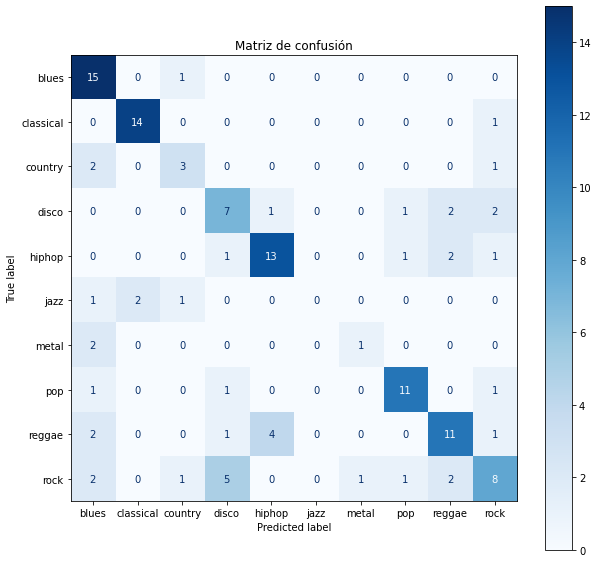

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
title="Matriz de confusión"
disp = plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, display_labels=clases)
disp.ax_.set_title(title);

Con la matriz de confusión vemos que para la mitad de las clases ha clasificado muy bien sus instancias y para la otra mitad mal. Así, las clases que más ha fallado han sido:
* Country: donde solo ha adivinado el 50% de las instancias que realmente eran de esa clase.
* Disco: donde a pesar de haber adivinado 7 ha fallado 6.
* Jazz: donde no ha adivinado ninguna.
* Metal: donde únicamente ha adivinado el 33%.
* Rock: donde ha adivinado 8 pero ha fallado 12.

* **Principales métricas de clasificación**

In [ ]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=clases))

              precision    recall  f1-score   support

       blues       0.60      0.94      0.73        16
   classical       0.88      0.93      0.90        15
     country       0.50      0.50      0.50         6
       disco       0.47      0.54      0.50        13
      hiphop       0.72      0.72      0.72        18
        jazz       0.00      0.00      0.00         4
       metal       0.50      0.33      0.40         3
         pop       0.79      0.79      0.79        14
      reggae       0.65      0.58      0.61        19
        rock       0.53      0.40      0.46        20

    accuracy                           0.65       128
   macro avg       0.56      0.57      0.56       128
weighted avg       0.63      0.65      0.63       128



Vemos que en general las métricas para cada clase no son tan buenas como se esperaban, sin embargo, al ver la matriz de confusión ya se podía intuir. En cuanto a las métricas *macro* (teniendo en cuenta todas como un conjunto) vemos que obtenemos muy malos resultados (alrededor de un 50-60% tanto para la *precision*, el *recall* y el *f1-score*). 

Y en cuanto a las *micro* veo que en general la *precision* no es muy buena (hay alguno que no adivina ninguna, en general están algo por encima del 50% y hay una con un 88%). El *recall* en general es algo mejor, aunque los que eran bajos en la *precision* ahora son más bajos aún. Y respecto al *f1-score* pasa muy parecido que con la *precision*. 

Finalmente, teniendo en cuenta el número de instancias de cada clase para darles peso (*weighted*) veo que salen resultados parecidos a las métricas *micro*.

* **Área bajo la curva**

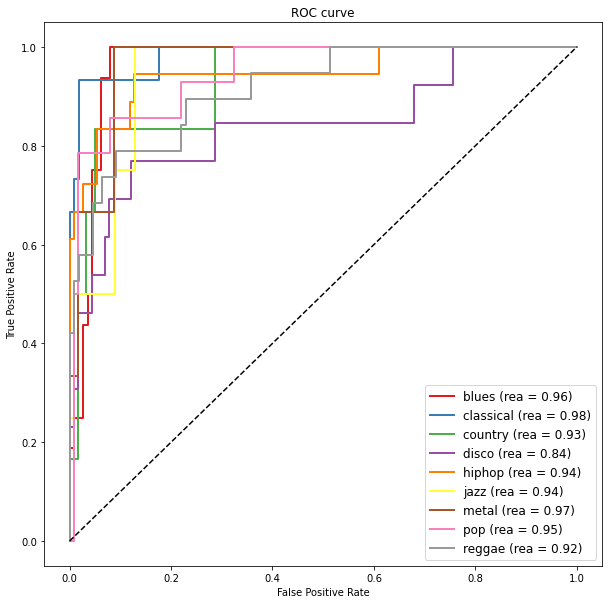

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = pipeline.decision_function(X_test)
y_test_bin = label_binarize(y_test, classes=range(0,10))

fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(clases)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

for i, color, c in zip(range(len(clases)), plt.get_cmap('Set1').colors, clases):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{c} (rea = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best', prop={'size': 12})
plt.show()

Sin embargo, con la mérica *ROC* estos malos resultados no se notan tanto, ya que hemos conseguido unos valores bastantes cercanos a 1 para cada clase, así que de aquí no podemos sacar muchas conclusiones.

**NOTA:** Como hemos dicho al principio no hemos partido el conjunto en tres (entrenamiento, validación y test) y esa puede ser una de las razones por la que nos den estos resultados, peores de lo esperado. Así que vamos a probar a calcular la accuracy con el conjunto de entrenamiento (training error) a ver si se ha producido overfitting.

In [ ]:
pipeline.score(X_train, y_train)

0.9893333333333333

Efectivamente, vemos que se ha producido overfitting, ya que a la hora de elegir modelo e hiperparámetros hemos utilizado el conjunto de test para ir viendo cuál era el mejor resultado, así que el modelo se ha ajustado demasiado a los datos.

# Ensembles

A partir de ahora, debido al overfitting producido anteriormente, vamos a separar, para los apartados de ensembles e interpretación, el conjunto en tres partes (entrenamiento, validación y test), por tanto no utilizaremos los métodos *cross-val-score* y *ShuffleSplit*. Además, queremos destacar que vamos a seguir utilizando este modelo para los ensembles, ya que al estar sobreentrenado puede ayudarnos a conseguir finalmente uno mejor. 

In [ ]:
%%time
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Cargamos los datos
df=pd.read_csv('data.csv')

# Desbalanceamos
indices = pd.Series(np.arange(100)).sample(n=10, random_state=1)

df_desb = []
for i,x in enumerate(indices):
    df_desb.append(df[100*i:100*(i+1)].sample(n=x, random_state=1))
df_desb = pd.DataFrame(np.concatenate(df_desb, axis=0), columns=df.columns)

# Separamos X e y
y_desb = df_desb['label']
clases = np.unique(y_desb)
y_desb = LabelEncoder().fit_transform(y_desb)
X_desb = df_desb.drop(['filename','label'], axis=1)


# Separamos en train, validación y test
X, X_test, y, y_test = train_test_split(X_desb, y_desb, train_size=0.9, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)
    
# Balanceamos 
over_sampling = RandomOverSampler(sampling_strategy='not majority', random_state=1)
X_train, y_train = over_sampling.fit_resample(X_train, y_train)

# Escalamos los datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

# Modelo
svc = SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, probability=True, random_state=1)
svc.fit(X_train_s, y_train)

print('Accuracy:', svc.score(X_val_s, y_val))

Accuracy: 0.6982758620689655
Wall time: 293 ms


Vemos que el resultado obtenido es bastante más bajo que el obtenido con cross validation, debido al overfitting mencionado anteriormente.

**1. Ensembles basados en votos**

Vamos a utilizar diferentes algoritmos con sus hiperparámetros por defecto junto con el modelo que hemos obtenido anteriormente. Usaremos la forma de voto *hard* (predice la clase que recibe más votos) y *soft* (predice la clase cuya suma de
probabilidades es mayor). No utilizaremos el hiperparámetro *weights* (pesos), ya que no queremos dar más importancia a unas clases que a otras. 

* **hard**

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(random_state=1,  penalty='l2')
dt = DecisionTreeClassifier(random_state=1)
svc = SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, probability=True, random_state=1)

voting = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', svc)], voting='hard')

for model in (lr, dt, svc, voting):
    model.fit(X_train_s, y_train)
    print(model.__class__.__name__, model.score(X_val_s, y_val))

LogisticRegression 0.6551724137931034
DecisionTreeClassifier 0.49137931034482757
SVC 0.6982758620689655
VotingClassifier 0.6896551724137931
Wall time: 657 ms


* **soft**

In [ ]:
%%time

lr = LogisticRegression(random_state=1,  penalty='l2')
dt = DecisionTreeClassifier(random_state=1)
svc = SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, probability=True, random_state=1)

voting = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', svc)], voting='soft')
voting.fit(X_train_s, y_train)

for model in (lr, dt, svc, voting):
    model.fit(X_train_s, y_train)
    print(model.__class__.__name__, model.score(X_val_s, y_val))

LogisticRegression 0.6551724137931034
DecisionTreeClassifier 0.49137931034482757
SVC 0.6982758620689655
VotingClassifier 0.6120689655172413
Wall time: 934 ms


Vemos que para ninguna de las dos formas hemos conseguido mejores resultados, así que vamos a probar con más ensembles.

**2. Bagging**

Vamos a aplicar *Bagging* a nuestro modelo para ver si conseguimos mejorarlo.

In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, probability=True, random_state=1),
                            n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=1)
bag.fit(X_train_s, y_train) 

print('Accuracy:', bag.score(X_val_s, y_val))

Accuracy: 0.6293103448275862
Wall time: 3.18 s


La accuracy obtenida es peor que la que se obtiene aplicando directamente el modelo.

**3. Random Forests**

Vamos a utilizar 1000 árboles con profundidad 20.

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_samples = 500, max_depth=20, n_jobs=-1, random_state=1)
rf.fit(X_train_s, y_train)

print('Accuracy:', rf.score(X_val_s, y_val))

Accuracy: 0.646551724137931
Wall time: 2.62 s


Seguimos sin mejorar el resultado.

**4. AdaBoost**

En este caso utilizamos nuestro modelo junto con 500 estimadores y un ratio de aprendizaje bajo.

In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, 
                                 probability=True, random_state=1), 
                             n_estimators=500, learning_rate=0.2, random_state=1)
ada.fit(X_train_s, y_train)

print('Accuracy:', ada.score(X_val_s, y_val))

Accuracy: 0.6379310344827587
Wall time: 1min 48s


Al igual que en los anteriores, no mejoramos el resultado.

**5. Gradient Boosting**

Aquí vamos a probar a disminuir la cantidad y profundidad de los árboles.

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=5, n_estimators=500, learning_rate=0.2, random_state=1)
gbrt.fit(X_train_s, y_train)

print('Accuracy:', gbrt.score(X_val_s, y_val))

Accuracy: 0.646551724137931
Wall time: 37 s


Vemos que este método es más lento y no obtenemos mejorar la accuracy con él.

**6. XGBoost**

Utilizaremos 1000 estimadores y un ratio de aprendizaje algo mayor.

In [ ]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.5,  random_state=1)
xgb.fit(X_train_s, y_train)
    
print('Accuracy:', xgb.score(X_val_s, y_val))

[17:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.6551724137931034
Wall time: 3.18 s


No conseguimos mejorar el resultado que ya tenemos.

**7. Stacking**

Para el primer nivel utilizaremos los métodos *LogisticRegression*, *DecisionTreeClassifier*, *Perceptron* y nuestro modelo *SVC*, y para el segundo nivel otro *LogisticRegression*. 

In [ ]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import Perceptron

level0 = []
level0.append(('lr', LogisticRegression(solver="liblinear", random_state=42)))
level0.append(('svc', SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, probability=True, random_state=1)))
level0.append(('dt', DecisionTreeClassifier(random_state=1)))
level0.append(('per', Perceptron(random_state=1)))

level1 = LogisticRegression()


stack = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stack.fit(X_train_s, y_train)

print('Accuracy:', stack.score(X_val_s, y_val))

Accuracy: 0.5775862068965517
Wall time: 1.56 s


El resultado obtenido es peor que los anteriores. Hemos probado diferentes combinaciones para los niveles y no conseguimos mejorar el resultado.

# Interpretabilidad

El modelo que vamos a interpretar es el que hemos creado sin utilizar ensembles, ya que es con el que mayor accuracy hemos obtenido con el conjunto de validación. Por tanto, reentrenamos el modelo juntando los conjuntos de entrenamiento y validación para entrenar el modelo con más datos. 

In [ ]:
%%time
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_colwidth', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Cargamos los datos
df=pd.read_csv('data.csv')

# Desbalanceamos
indices = pd.Series(np.arange(100)).sample(n=10, random_state=1)

df_desb = []
for i,x in enumerate(indices):
    df_desb.append(df[100*i:100*(i+1)].sample(n=x, random_state=1))
df_desb = pd.DataFrame(np.concatenate(df_desb, axis=0), columns=df.columns)

# Separamos X e y
y_desb = df_desb['label']
clases = np.unique(y_desb)
y_desb = LabelEncoder().fit_transform(y_desb)
X_desb = df_desb.drop(['filename','label'], axis=1)
columnas = X_desb.columns

# Separamos en train, validación y test
X, X_test, y, y_test = train_test_split(X_desb, y_desb, train_size=0.9, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)
    
# Balanceamos 
over_sampling = RandomOverSampler(sampling_strategy='not majority', random_state=1)
X_train, y_train = over_sampling.fit_resample(X_train, y_train)

# Escalamos los datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

# Unimos train y val
X_train_new = np.concatenate((X_train_s, X_val_s), axis=0)
y_train_new = np.concatenate((y_train, y_val), axis=0)

# Modelo
svc = SVC(C=2.211405019131734, kernel='rbf', gamma=0.06863740013342447, probability=True, random_state=1)
svc.fit(X_train_new, y_train_new)

print('Accuracy:', svc.score(X_test_s, y_test))

Accuracy: 0.6875
Wall time: 6.79 s


Este modelo es un modelo de caja negra, así que vamos a hacer uso de un modelo subrogado (usaremos *DecisionTreeClassifier*) o aplicar otras técnicas (*LIME*, *SHAP*...) para poder interpretarlo.

**1. Modelo subrogados**

Como hemos dicho anteriormente utilizaremos *DecisionTreeClassifier* para crear un modelo subrogado de nuestro modelo *SVC* para poder interpretarlo visualmente.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

y_pred = svc.predict(X_train_new)

model_subrogate = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=5)
model_subrogate.fit(X_train_new, y_pred)

print('Accuracy:', model_subrogate.score(X_train_new, y_pred))

Accuracy: 0.5310173697270472


Vemos que solo obtenemos un 50% de parecido entre el modelo subrogado y el original. Por tanto, la interpretación que podemos hacer no corresponderá exactamente con la real. Mostramos el árbol de decisión.

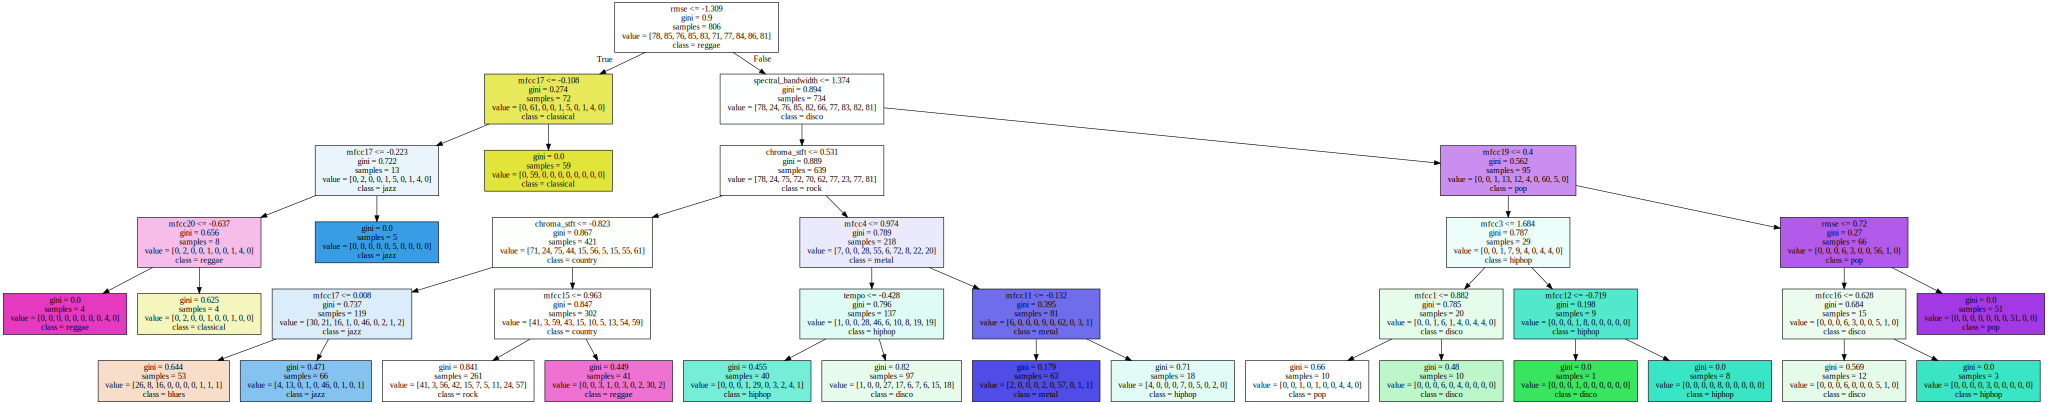

In [ ]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(model_subrogate, feature_names=columnas, class_names=clases, filled=True) 
graphviz.Source(tree_graph)

Como tenemos muchas clases el árbol resultante es muy grande, aún así podemos decir que las características más importantes son las que se encuentran en la raíz: *rmse*, *mfcc17* y *spectral_bandwidth*. Vamos a mostrar la importancia de cada característica, a ver si coincide con lo que acabamos de ver.

In [ ]:
pd.DataFrame({'Importancia': model_subrogate.feature_importances_}, 
             index=columnas).sort_values(by='Importancia', ascending=False)

,Importancia
rmse,0.2017
chroma_stft,0.1888
mfcc17,0.1322
spectral_bandwidth,0.1248
mfcc4,0.1107
mfcc15,0.0643
mfcc19,0.0456
tempo,0.0405
mfcc11,0.0284
mfcc3,0.0191


Vemos que efectivamente 3 de las 4 características más importantes son las que habíamos observado en el árbol.

**2. Importancia de la permutación**

A partir de ahora ya no vamos a tener que utilizar el modelo subrogado, así que ya vamos a poder utilizar únicamente nuestro modelo previamente creado.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(svc, random_state=1).fit(X_train_new, y_train_new)
eli5.show_weights(perm, feature_names = columnas.to_list())

Weight,Feature
0.0608 ± 0.0121,mfcc4
0.0538 ± 0.0171,rmse
0.0506 ± 0.0134,mfcc9
0.0439 ± 0.0079,chroma_stft
0.0357 ± 0.0120,mfcc18
0.0333 ± 0.0088,mfcc17
0.0330 ± 0.0101,mfcc6
0.0310 ± 0.0065,mfcc11
0.0266 ± 0.0132,mfcc3
0.0263 ± 0.0076,mfcc19


En este caso obtenemos que las 4 características que tienen más importancia en el modelo son: *mfcc4*, *rmse*, *mfcc9* y *chroma_stft*. Sin embargo, la diferencia entre los valores obtenidos para las columnas no es demasiado grande, por lo que la importancia de ellas no varía demasiado.

**3. Gráficos de dependencia parcial**

Vamos a ver el gráfico correspondiente a la columna del error cuadrático (*rmse*), ya que antes hemos visto que es la más importante.

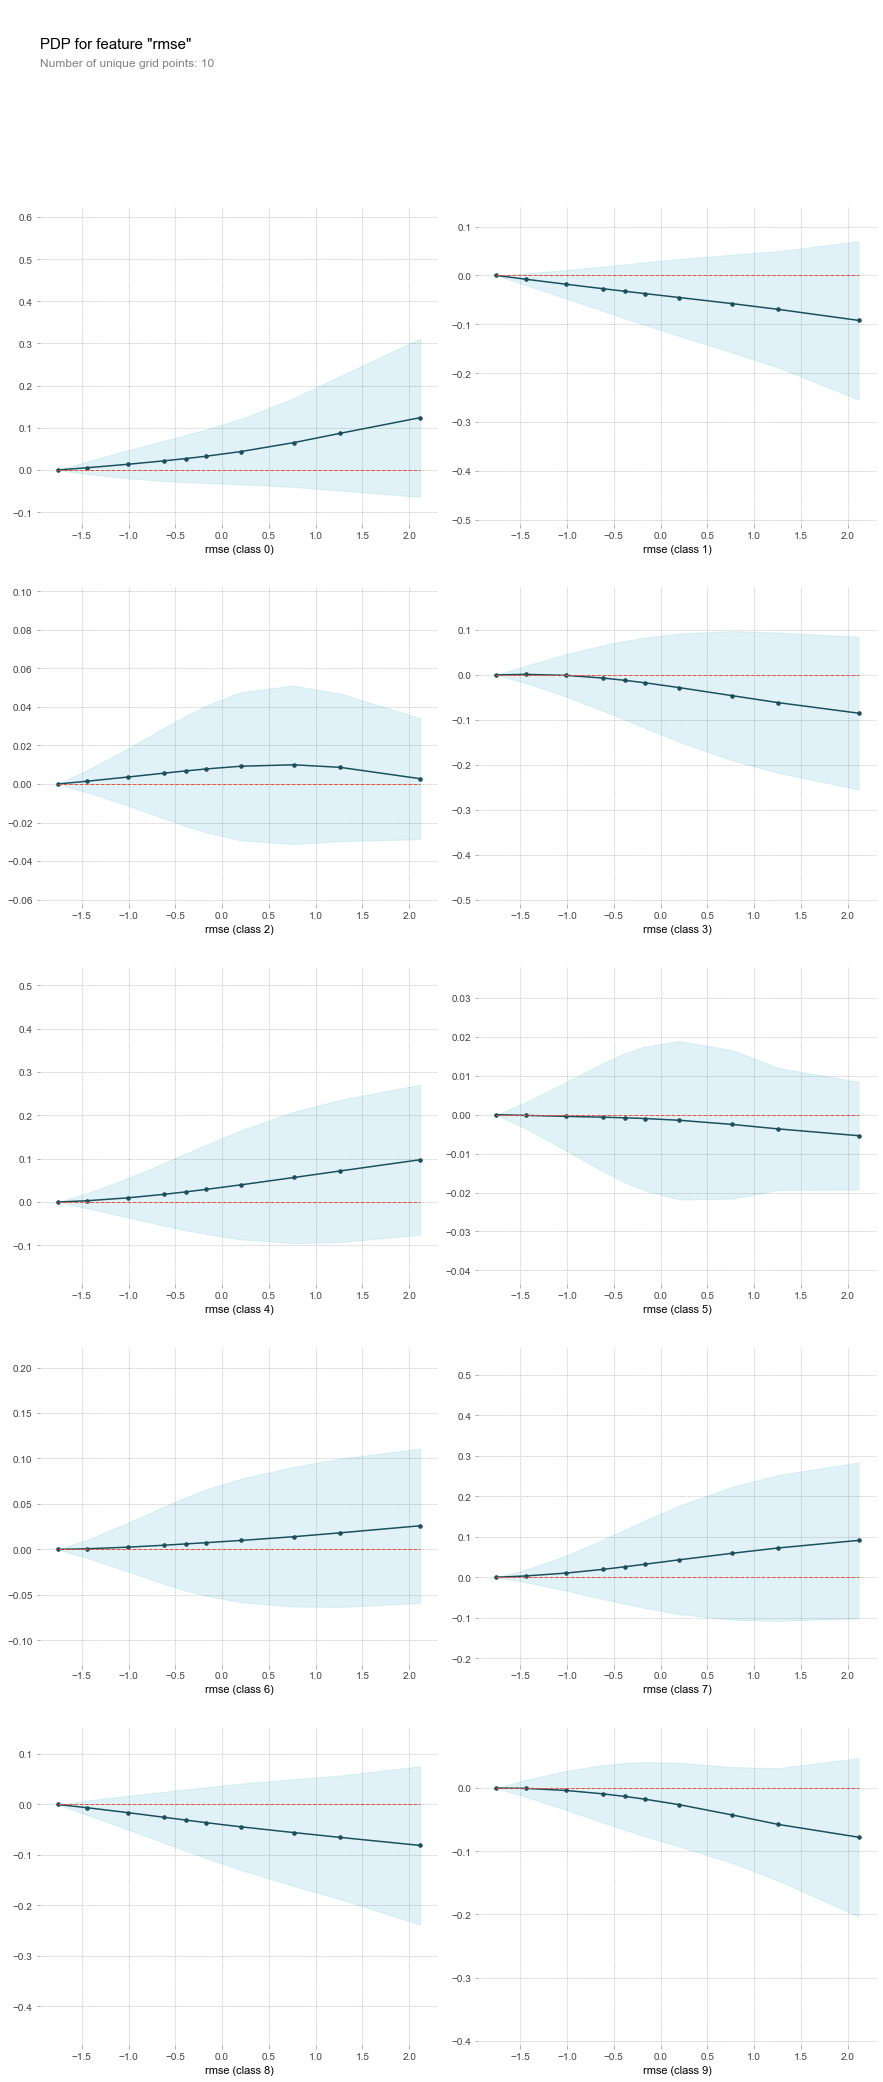

In [ ]:
from pdpbox import pdp

pdp_rmse = pdp.pdp_isolate(model=svc, dataset=pd.DataFrame(X_test_s, columns=columnas), model_features=columnas, feature='rmse')

pdp.pdp_plot(pdp_rmse, 'rmse')
plt.show()

Como podemos observar, tenemos una gráfica diferente para cada clase. En general todas tienen la misma forma, sin embargo, no queda claro en que valores hacen los cambios de tendencia, y si miramos los valores de cambio mostrados en el árbol para dicha característica vemos que se puede identificar en alguna gráfica.

Para mostrar el gráfico de dependencia lineal de 2 dimensiones añadimos la característica *chroma_stft*, ya que es otra de las que hemos visto que eran más importantes.

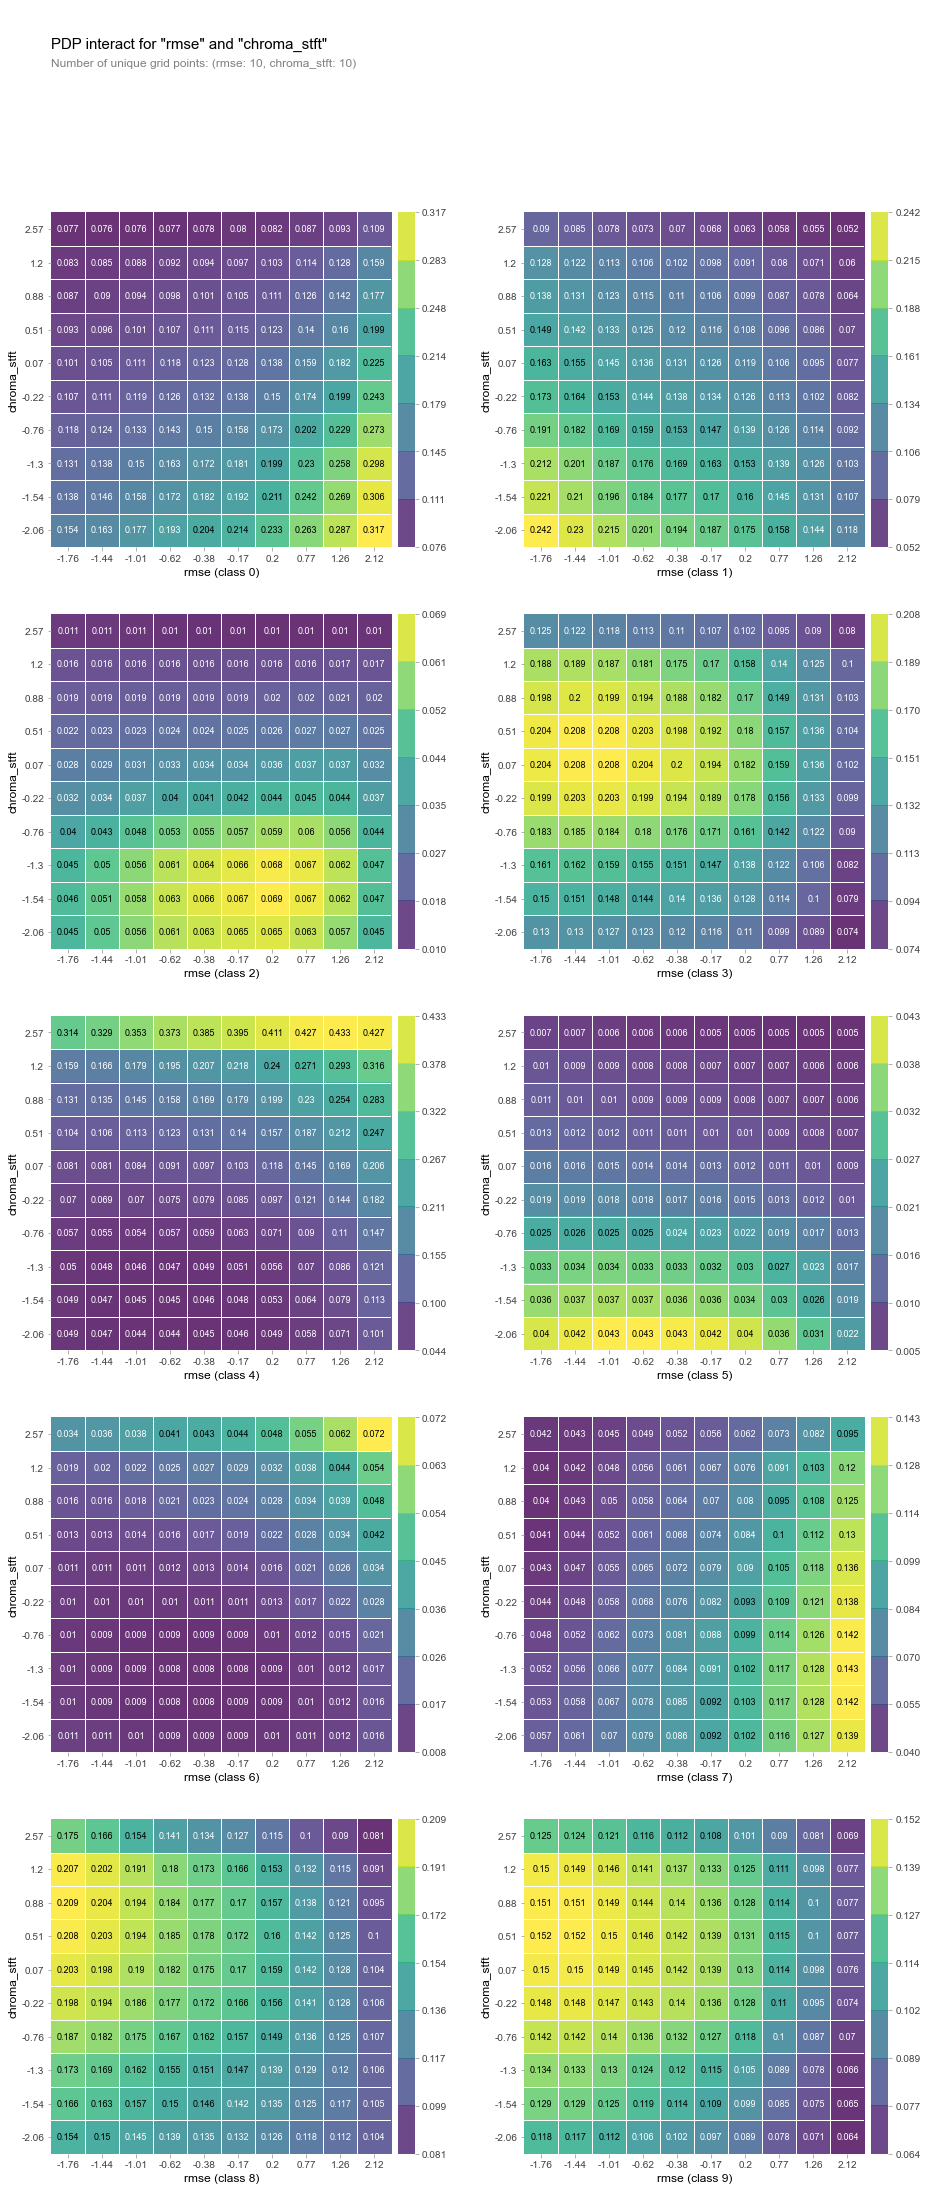

In [ ]:
features_to_plot = ['rmse', 'chroma_stft']
inter1  =  pdp.pdp_interact(model=svc, dataset=pd.DataFrame(X_test_s, columns=columnas), model_features=columnas, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
plt.show()

Como vemos, al igual que en las gráficas anteriores, tenemos una gráfica para cada clase. En este caso no hay demasiado parecido entre ellas, asi que vamos a analizar unicamente la última gráfica, para la clase 9 (*rock*).

En ella observamos que para mayores valores del *rmse* peor es el resultado y que para valores más pequeños depende del valor de la variable *chroma_stft*, el cual tanto para valores pequeños como grandes empeora el resultado, mientras que si es un valor central (entre -0.22 y 1.2) el resultado mejora. Vemos que las clases 3 (*disco*) y 8 (*reggae*) tienen el mismo comportamiento.

**4. LIME**

Esta técnica no hace una interpretación global de los datos, por lo que para este caso vamos a utilizar la primera instancia del test para analizar el resultado obtenido y mostrar la gráfica para la clase que predice.

In [ ]:
row_to_show = 1
data_for_prediction = X_test_s[row_to_show]
data_for_prediction_array = data_for_prediction.reshape(1, -1)
class_pred = svc.predict(data_for_prediction_array)[0]
print('Clase predecida:', clases[class_pred])
for i,p in enumerate(svc.predict_proba(data_for_prediction_array)[0]):
    print('Probabilidad de clase', clases[i], '->', p)

Clase predecida: pop
Probabilidad de clase blues -> 0.004168680531657948
Probabilidad de clase classical -> 0.004800321404768117
Probabilidad de clase country -> 0.011351427821246063
Probabilidad de clase disco -> 0.09342077688636609
Probabilidad de clase hiphop -> 0.1369588098181293
Probabilidad de clase jazz -> 0.002459134432376767
Probabilidad de clase metal -> 0.003914972291631485
Probabilidad de clase pop -> 0.6223502937322899
Probabilidad de clase reggae -> 0.0381497502242709
Probabilidad de clase rock -> 0.08242583285726303


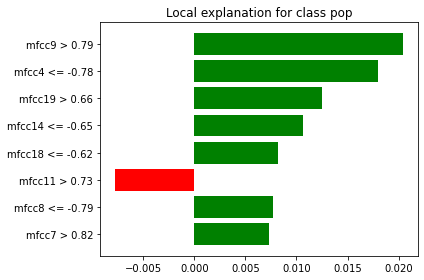

In [ ]:
from lime.lime_tabular import LimeTabularExplainer 

lime_explainer = LimeTabularExplainer(X_train_new[:,:],
                                      feature_names=columnas,
                                      class_names=clases,
                                      categorical_features=None,
                                      mode="classification", random_state=1)                        

exp = lime_explainer.explain_instance(data_for_prediction, svc.predict_proba, num_features=8, labels=[class_pred])

exp.as_pyplot_figure(label=class_pred)
plt.tight_layout()

Vemos que las características que más inflluyen positivamente para esta instancia en el resultado de la clase *pop* son principalmente 
* *mfcc9* > 0.79 
* *mfcc4* <= -0.78  
* *mfcc19* > 0.66 

Y la variables que más influye negativamente es *mfcc11* > 0.73.

**5. SHAP**

Igual que en el anterior caso, esta técnica sirve para hacer una interpretación local y utilizaremos la misma instancia que antes.

In [ ]:
row_to_show = 1
data_for_prediction = X_test_s[row_to_show]
data_for_prediction_array = data_for_prediction.reshape(1, -1)
class_pred = svc.predict(data_for_prediction_array)[0]
print('Clase predecida:', clases[class_pred])
for i,p in enumerate(svc.predict_proba(data_for_prediction_array)[0]):
    print('Probabilidad de clase', clases[i], '->', p)

Clase predecida: pop
Probabilidad de clase blues -> 0.004168680531657948
Probabilidad de clase classical -> 0.004800321404768117
Probabilidad de clase country -> 0.011351427821246063
Probabilidad de clase disco -> 0.09342077688636609
Probabilidad de clase hiphop -> 0.1369588098181293
Probabilidad de clase jazz -> 0.002459134432376767
Probabilidad de clase metal -> 0.003914972291631485
Probabilidad de clase pop -> 0.6223502937322899
Probabilidad de clase reggae -> 0.0381497502242709
Probabilidad de clase rock -> 0.08242583285726303


In [ ]:
import shap 

explainer = shap.KernelExplainer(svc.predict, X_train_new)
shap_values = explainer.shap_values(data_for_prediction)

Using 806 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, features=data_for_prediction, feature_names=columnas)

Vemos que al igual que antes la variable que más influye positivamente es *mfcc9* para ser de clase *pop*, sin embargo el resto de variables más importantes no coinciden con las anteriores. Mostramos el gráfico *SHAP* de resumen para mostrar la importancia de las variables para todas las instancias del conjunto de test.

In [ ]:
shap_values = explainer.shap_values(X_test_s)

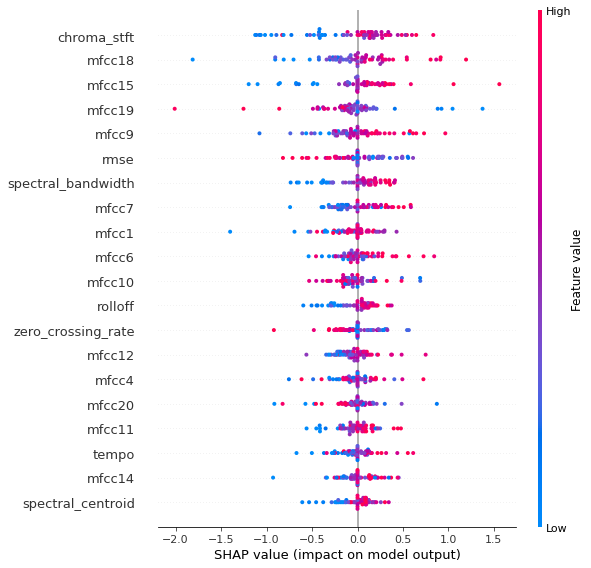

In [ ]:
shap.summary_plot(shap_values, pd.DataFrame(X_test_s, columns = columnas))

Vemos que para la clase *pop* casi todas las variables influyen de manera similar, teniendo todas las variables impotancia para unas u otras instancias, es decir, no hay ninguna variable que podamos decir que nunca influye sobre los datos. 

Finalmente, mostramos el gráfico *SHAP* de contribución de dependencias para la variable *rmse* sin especificar el valor de *interaction_index*, es decir, dejando que se elija la que pueda ser más interesante.

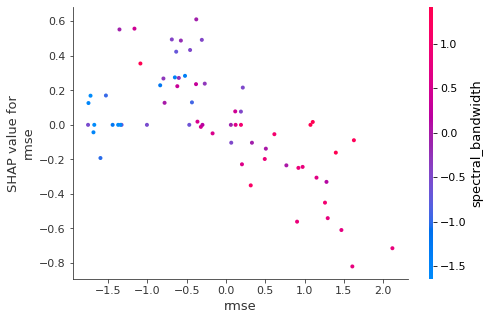

In [ ]:
shap.dependence_plot('rmse', shap_values, pd.DataFrame(X_test_s, columns = columnas))

Observamos que la variable que ha elegido para el color es *spectral_bandwidth*. Vemos que a mayor valor de *rmse* corresponde a mayor valor de *spectral_bandwidth* y eso implica valores *SHAP* bajos. Por el contrario, a menor valor de *rmse* corresponde a menor valor de *spectral_bandwidth* y eso implica valores *SHAP* más altos.